## VGG16

VGG16 is a convolution neural net (CNN ) architecture which was used to win ILSVR(Imagenet) competition in 2014. Still it is the one of the excellent vision model architecture till date. 

Most unique thing about VGG16 is that instead of having a large number of hyper-parameter they focused on having convolution layers of 3x3 filter with a stride 1 and always used same padding and maxpool layer of 2x2 filter of stride 2. 

It follows this arrangement of convolution and max pool layers consistently throughout the whole architecture. In the end it has 2 FC(fully connected layers) followed by a softmax for output. The 16 in VGG16 refers to it has 16 layers that have weights. This network is a pretty large network and it has about 138 million (approx) parameters.

### VGG16 architecture

![VGG16 architecture](./1_3-TqqkRQ4rWLOMX-gvkYwA.png "VGG16 architecture")

### Imports

Importing all the libraries which will be need to implement VGG16. 

Using Sequential method creates a sequential model. Sequential model means that all the layers of the model will be arranged in sequence. 

Imported ImageDataGenerator from keras.preprocessing. The objective of ImageDataGenerator is to import data with labels easily into the model. It is a very useful class as it has many function to rescale, rotate, zoom, flip etc. The most useful thing about this class is that it doesn’t affect the data stored on the disk. This class alters the data on the go while passing it to the model.

In [1]:
# !wget --no-check-certificate \
#   https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
#   -O cats_and_dogs_filtered.zip

In [2]:
# ! unzip cats_and_dogs_filtered.zip

In [3]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

2022-10-30 17:38:04.056004: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-30 17:38:04.056021: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="../_datasets/cats_and_dogs_filtered/train/",target_size=(224,224))
    
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="../_datasets/cats_and_dogs_filtered/validation/", target_size=(224,224))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
model = Sequential()

# 2 x convolution layer of 64 channel of 3x3 kernal and same padding
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

# 1 x maxpool layer of 2x2 pool size and stride 2x2
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# 2 x convolution layer of 128 channel of 3x3 kernal and same padding
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

# 1 x maxpool layer of 2x2 pool size and stride 2x2
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# 3 x convolution layer of 256 channel of 3x3 kernal and same padding
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

# 1 x maxpool layer of 2x2 pool size and stride 2x2
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# 3 x convolution layer of 512 channel of 3x3 kernal and same padding
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

# 1 x maxpool layer of 2x2 pool size and stride 2x2
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# 3 x convolution layer of 512 channel of 3x3 kernal and same padding
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

# 1 x maxpool layer of 2x2 pool size and stride 2x2
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

2022-10-30 17:38:05.027540: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-30 17:38:05.027556: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-30 17:38:05.027570: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mono-Prestige-14Evo-A11M): /proc/driver/nvidia/version does not exist
2022-10-30 17:38:05.027747: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Add relu(Rectified Linear Unit) activation to each layers so that all the negative values are not 
# passed to the next layer.
model.add(Flatten())

# Used RELU activation for both the dense layer of 4096 units so that stop forwarding negative values 
# through the network. 
# Used 2 unit dense layer in the end with softmax activation as we 2 classes to predict 
# from in the end which are dog and cat. 
# The softmax layer will output the value between 0 and 1 based on the confidence of the model that which 
# class the images belongs to.

# Pass the data to the dense layer. That flatten the vector which comes out of the convolutions and add:
# 1 x Dense layer of 4096 units
model.add(Dense(units=4096,activation="relu"))
# 1 x Dense layer of 4096 units
model.add(Dense(units=4096,activation="relu"))
# 1 x Dense Softmax layer of 2 units
model.add(Dense(units=2, activation="softmax"))

### Adam optimiser

Used to reach to the global minima while training out model. If model is stuck in local minima while training then the adam optimiser will help us to get out of local minima and reach global minima. 

Also specified the learning rate of the optimiser, here in this case it is set at 0.001. If our training is bouncing a lot on epochs then we need to decrease the learning rate so that we can reach global minima.

In [7]:
from keras.optimizers import Adam

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

ModelCheckpoint helps us to save the model by monitoring a specific parameter of the model. In this case we monitoring validation accuracy by passing val_acc to ModelCheckpoint. The model will only be saved to disk if the validation accuracy of the model in current epoch is greater than what it was in the last epoch.

EarlyStopping helps us to stop the training of the model early if there is no increase in the parameter which have set to monitor in EarlyStopping. In this case we monitoring validation accuracy by passing val_acc to EarlyStopping. Here we have hence to 20 which means that the model will stop to train if it doesn’t see any rise in validation accuracy in 20 epochs.

We using model.fit_generator as ImageDataGenerator to pass data to the model. We will pass train and test data to fit_generator. In fit_generator steps_per_epoch will set the batch size to pass training data to the model and validation_steps will do the same for test data. We can tweak it based on your system specifications.

In [9]:
from livelossplot.inputs.keras import PlotLossesCallback

BATCH_SIZE = 64
metric = 'val_accuracy'
n_steps_per_epoch = 2000//BATCH_SIZE # Train size // Bath size
n_validation_steps = 1000//BATCH_SIZE # Test size // Bath size
epochs = 10
plot_loss = PlotLossesCallback()

In [10]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(filepath="vgg16_1.h5", save_freq="epoch", monitor=metric, verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor=metric, min_delta=0, patience=20, verbose=1, mode='auto')

# hist = model.fit_generator(generator=traindata,
hist = model.fit(traindata,
                            batch_size=BATCH_SIZE,
                            epochs=10,
                            validation_data=traindata,
                            steps_per_epoch=n_steps_per_epoch,
                            validation_steps=n_validation_steps,
                            callbacks=[checkpoint, early],
#                             callbacks=[checkpoint, early, plot_loss],
                            verbose=1)
for key in hist.history:
    print(key)

Epoch 1/10
31/31 [==============================] - ETA: 0s - loss: 163.4025 - accuracy: 0.4899 
Epoch 1: val_accuracy improved from -inf to 0.47708, saving model to vgg16_1.h5
31/31 [==============================] - 368s 12s/step - loss: 163.4025 - accuracy: 0.4899 - val_loss: 0.6941 - val_accuracy: 0.4771
Epoch 2/10
31/31 [==============================] - ETA: 0s - loss: 0.6943 - accuracy: 0.5050 
Epoch 2: val_accuracy improved from 0.47708 to 0.57917, saving model to vgg16_1.h5
31/31 [==============================] - 375s 12s/step - loss: 0.6943 - accuracy: 0.5050 - val_loss: 0.6925 - val_accuracy: 0.5792
Epoch 3/10
31/31 [==============================] - ETA: 0s - loss: 0.6939 - accuracy: 0.4819 
Epoch 3: val_accuracy did not improve from 0.57917
31/31 [==============================] - 379s 12s/step - loss: 0.6939 - accuracy: 0.4819 - val_loss: 0.6931 - val_accuracy: 0.4979
Epoch 4/10
31/31 [==============================] - ETA: 0s - loss: 0.6937 - accuracy: 0.4918 
Epoch 4: 

### Visualisation of training/validation accuracy and loss

Passing the output of mode.fit_generator to hist variable means that all the training/validation accuracy and loss are stored in hist and will by visualised from there.

In [11]:
hist.history

{'loss': [163.4024658203125,
  0.6943288445472717,
  0.6938512921333313,
  0.6937162280082703,
  0.6932634711265564,
  0.6931745409965515,
  0.6931030750274658,
  0.6937494874000549,
  0.6961939334869385,
  1.2410129308700562],
 'accuracy': [0.48991936445236206,
  0.5050403475761414,
  0.4818548262119293,
  0.49180328845977783,
  0.4969758093357086,
  0.4928278625011444,
  0.5,
  0.524193525314331,
  0.5252016186714172,
  0.47782257199287415],
 'val_loss': [0.6940689086914062,
  0.692474901676178,
  0.6931148767471313,
  0.6938419342041016,
  0.6929905414581299,
  0.6929386258125305,
  0.6926160454750061,
  0.7055041790008545,
  0.6926339268684387,
  0.6899482607841492],
 'val_accuracy': [0.47708332538604736,
  0.5791666507720947,
  0.49791666865348816,
  0.48750001192092896,
  0.5020833611488342,
  0.4833333194255829,
  0.5083333253860474,
  0.4791666567325592,
  0.5166666507720947,
  0.5645833611488342]}

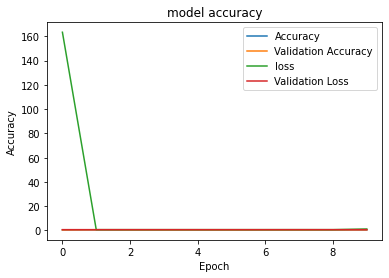

In [12]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

### Validation on test data

In [14]:
from tensorflow.keras.models import load_model
saved_model = load_model("vgg16_1.h5")

true_classes = testdata.classes
class_indices = traindata.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

vgg_preds = saved_model.predict(testdata)
vgg_pred_classes = np.argmax(vgg_preds, axis=1)

32/32 [==============================] - 99s 3s/step


In [15]:
from sklearn.metrics import accuracy_score

vgg_acc = accuracy_score(true_classes, vgg_pred_classes)
print("VGG16 Model Accuracy without Fine-Tuning: {:.2f}%".format(vgg_acc * 100))

VGG16 Model Accuracy without Fine-Tuning: 51.60%


### Doing a prediction

Loading the image using image method in keras and converte it to numpy array and added an extra dimension to the image to image for matching NHWC (Number, Height, Width, Channel) format of keras.



In [16]:
from tensorflow.keras.preprocessing import image

def fit_image(image_addr):
    img = image.load_img(image_addr, target_size=(224,224))
    img = np.asarray(img)
    plt.imshow(img)
    img = np.expand_dims(img, axis=0)

    output = saved_model.predict(img)
    if output[0][0] > output[0][1]:
        print("cat")
    else:
        print('dog')

1/1 [==============================] - 0s 199ms/step
dog


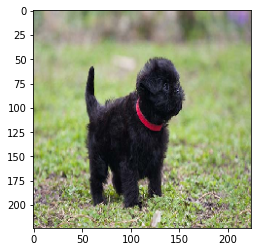

In [17]:
fit_image("Affenpinscher-puppy-standing-outdoors-in-the-grass-1.jpg")

1/1 [==============================] - 0s 133ms/step
dog


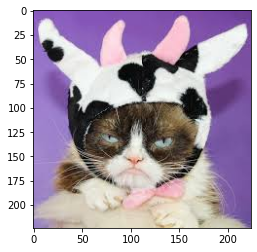

In [18]:
fit_image("images.jpg")

1/1 [==============================] - 0s 133ms/step
dog


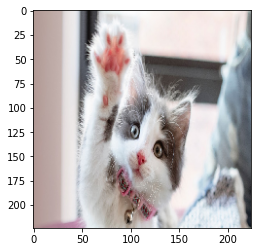

In [19]:
fit_image("kitten-510651.jpg")

To make this model work for any number of classes by changing the the unit of last softmax dense layer to whatever number we want based on the classes which we need to classify.To

### Sources

1. [Source 1](https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c)
2. [Source 2](https://www.learndatasci.com/tutorials/hands-on-transfer-learning-keras/)